<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_make_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import time
import os.path
import requests
from numpy import genfromtxt
from sklearn.datasets import make_blobs
import pandas as pd
!mkdir data #let us create data folder to hold our data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [14]:
blobs, labels = make_blobs(n_samples=500, centers=3, n_features=10, cluster_std=2, random_state=0)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,8.464776,-0.069017,1.756548,8.707434,-5.776232,-7.940546,-11.879435,4.030456,2.497293,3.976303
1,0.280346,1.597010,-0.010019,0.024167,-4.812835,2.105739,-2.318796,7.886270,11.581623,-1.986161
2,7.101569,-0.639732,0.908646,12.363544,-4.675757,-5.777533,-7.718462,4.613895,6.588259,6.682010
3,6.498527,4.858662,-3.969435,7.259363,-2.651539,4.822131,-7.695410,8.926791,2.744806,-2.908591
4,7.716717,9.796369,-2.834763,5.255861,-10.935268,-2.278602,-5.112753,9.064783,-3.030756,-4.987964


In [12]:
data = blobs
data_labels = labels
file_2d = 'data/blobs-2d.txt'

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


blobs dataset : Groundtruht


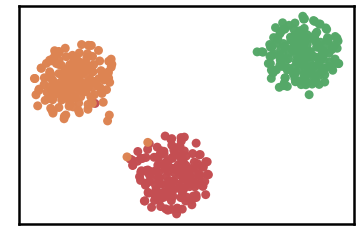



blobs dataset : DenMune Clustering


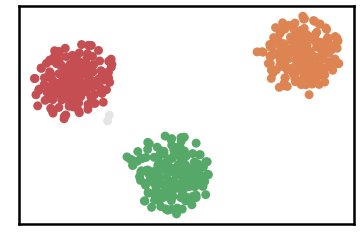

DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.092
│   ├── NGT: 0.017
│   └── t_SNE: 3.127
├── n_clusters
│   ├── actual: 3
│   └── detected: 3
├── n_points
│   ├── dim: 10
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 2
│   ├── size: 500
│   ├── strong: 308
│   └── weak
│       ├── all: 192
│       ├── failed to merge: 2
│       └── succeeded to merge: 190
└── validity
    ├── ACC: 497
    ├── AMI: 0.969
    ├── ARI: 0.982
    ├── F1: 0.994
    ├── NMI: 0.969
    ├── completeness: 0.969
    └── homogeneity: 0.969

k= 12 F1 score is: 0.994


In [22]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 12
dm = DenMune(data=data,  file_2d=file_2d, k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True )
labels_pred = dm.fit_predict()

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset
    print ("blobs dataset", ": Groundtruht")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

# Let us plot the results produced using DenMune
print ("blobs dataset", ": DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)

validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
validity_key = "F1" 
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))